In [1]:
from sklearn.model_selection import StratifiedKFold, KFold
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
import json

from scipy import stats
from matplotlib import gridspec
import random 
from time import process_time
import statsmodels.api as sm

import os 
import pandas as pd
import scipy.io
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
# warnings.simplefilter(action='ignore', category=PerformanceWarning)
warnings. filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
save_path = 'G:/My Drive/WORKING_MEMORY/PAPER/ANALYSIS_figures/'
os.chdir(save_path)
file_name = 'final_log_dds_fulltrial'
df_cum_sti = pd.read_csv(file_name+'.csv', index_col = 0)

# save_path = 'G:/Mi unidad/WORKING_MEMORY/PAPER/ANALYSIS_figures/'
# os.chdir(save_path)
# file_name = 'logodds_singletrial_V11'
# df_cum_sti.to_csv(file_name+'_sti.csv')

E22_2022-01-22_17-09-15.csv


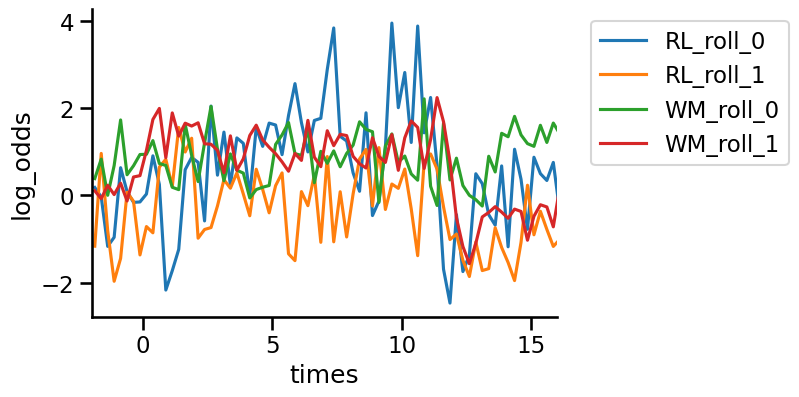

E22_2022-01-17_18-05-16.csv


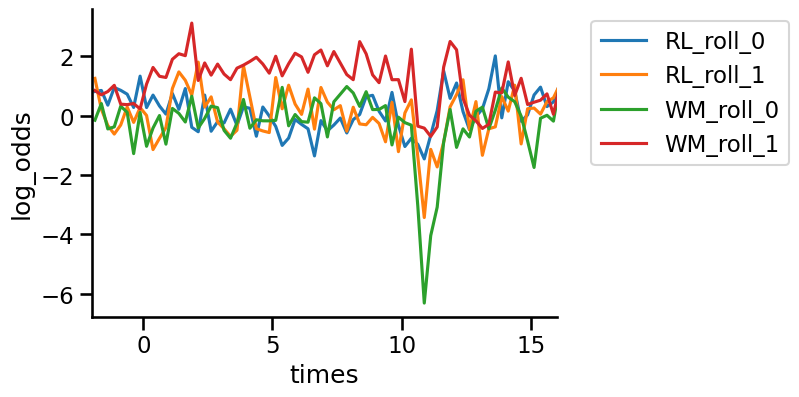

E22_2022-01-16_18-00-47.csv


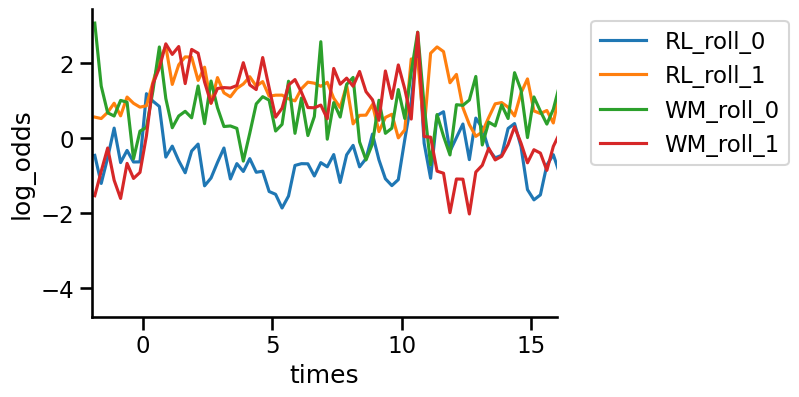

E22_2022-01-15_16-53-52.csv


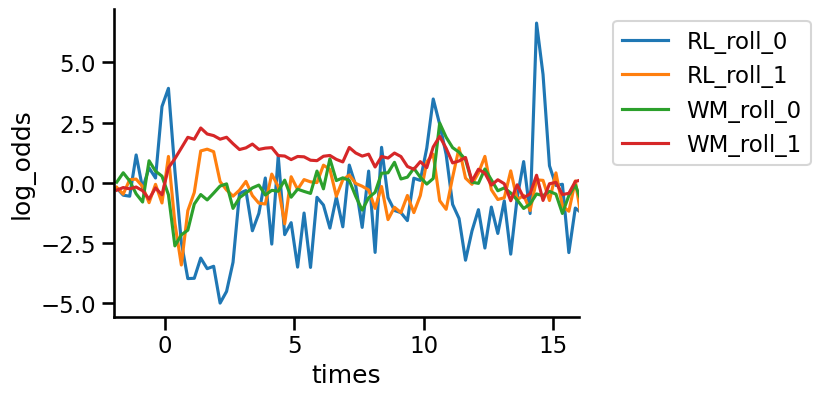

E22_2022-01-14_16-50-37.csv


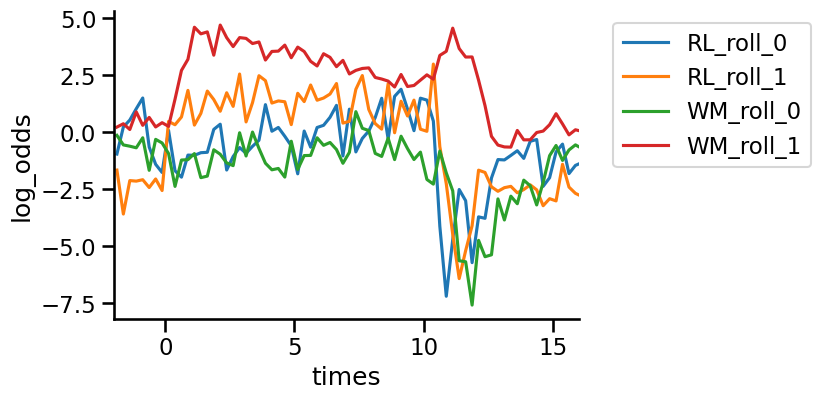

E22_2022-01-13_16-34-24.csv


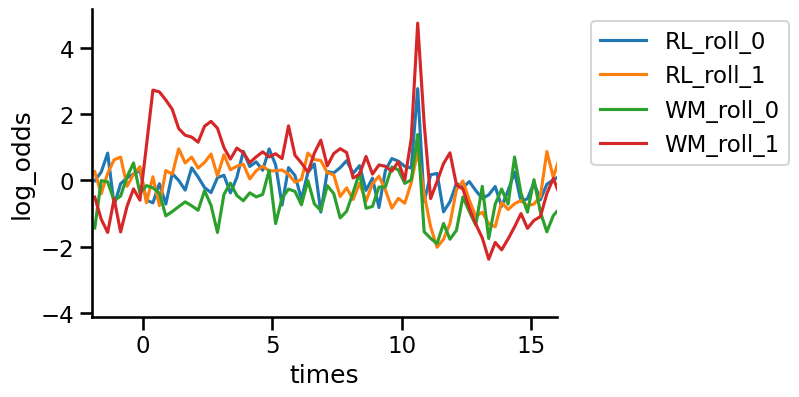

E20_2022-03-01_16-11-01.csv


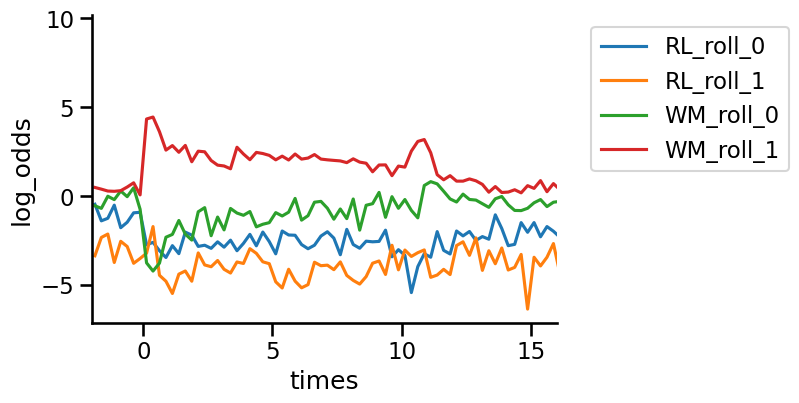

E20_2022-02-28_16-05-49.csv


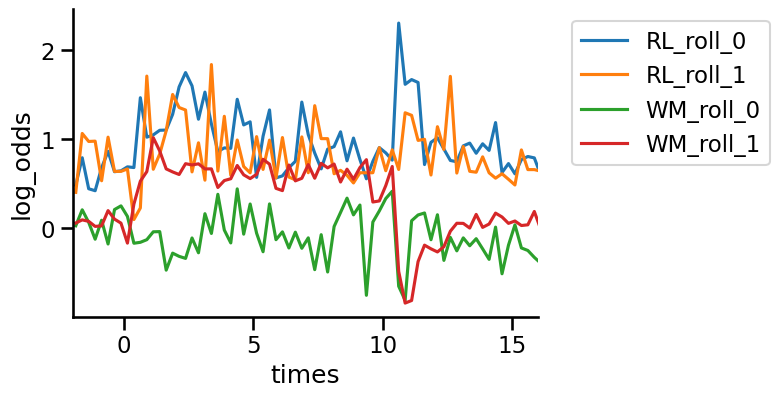

E20_2022-02-27_17-02-17.csv


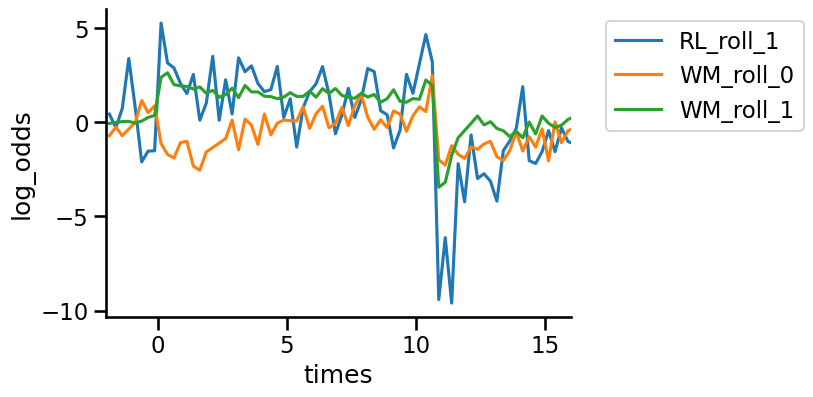

E20_2022-02-26_16-49-05.csv


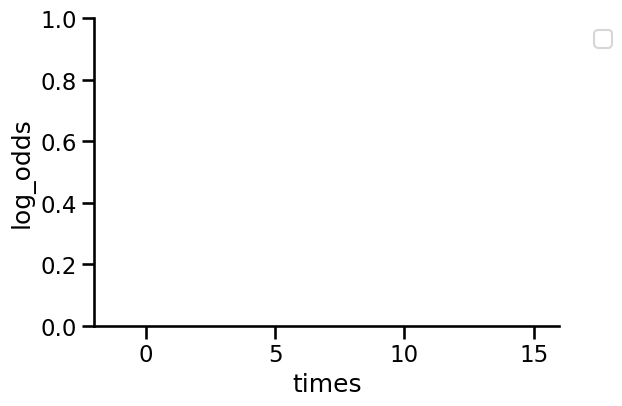

E20_2022-02-15_16-02-28.csv


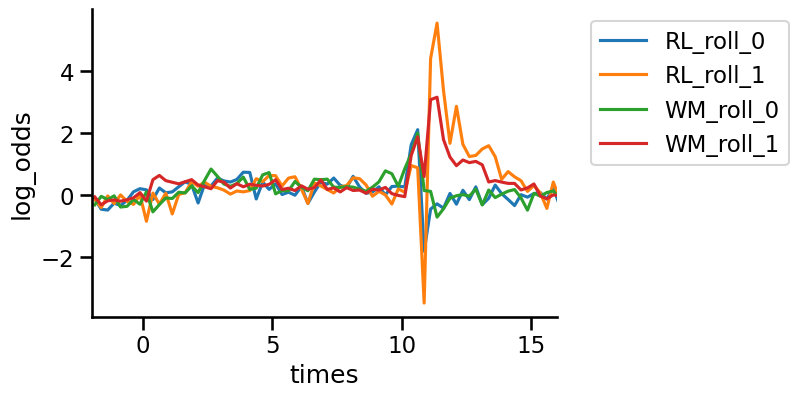

E20_2022-02-14_16-01-30.csv


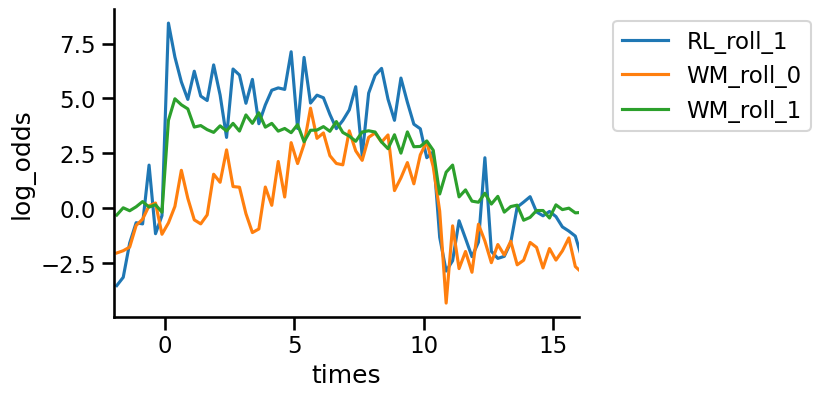

E20_2022-02-13_15-10-51.csv


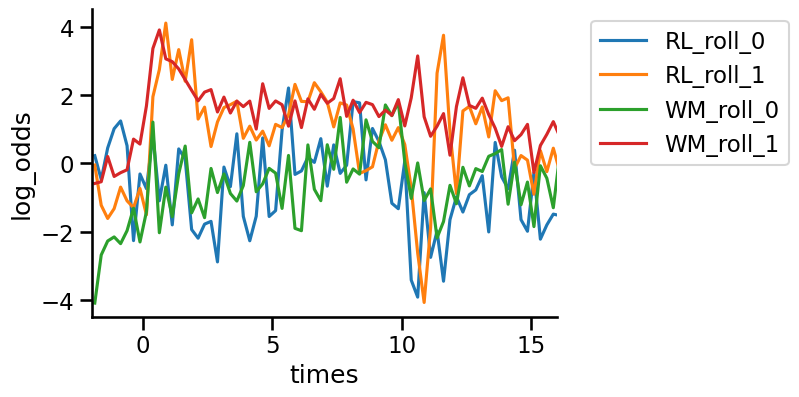

E20_2022-02-12_15-23-55.csv


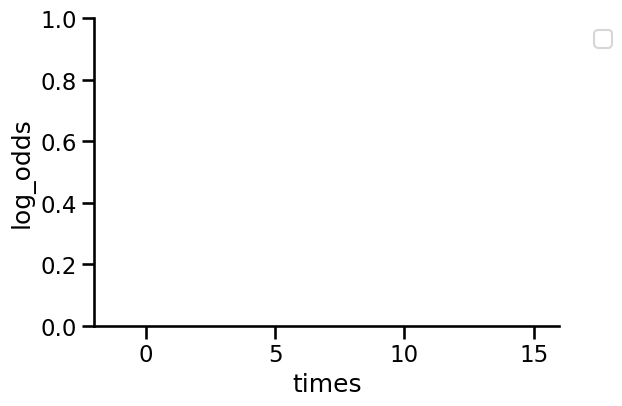

E19_2022-01-14_14-42-13.csv


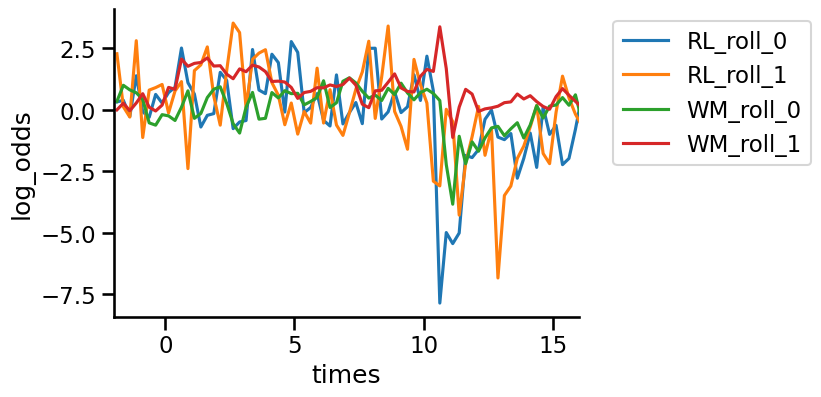

E17_2022-02-02_17-13-06.csv


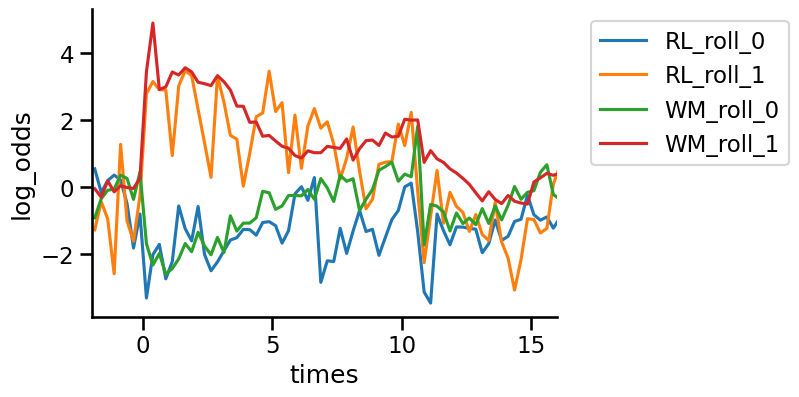

E17_2022-02-01_17-02-16.csv


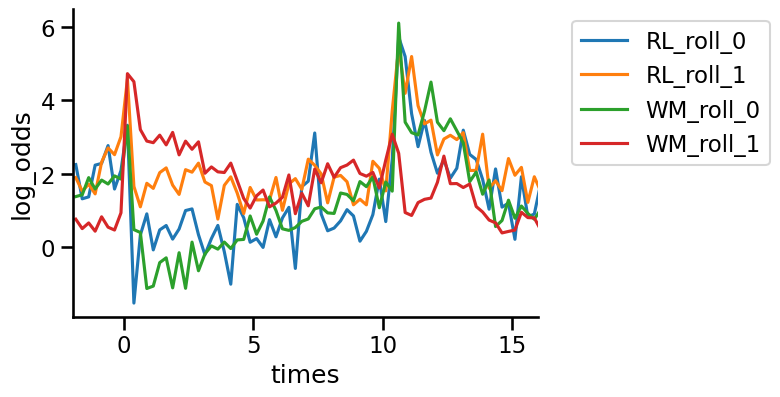

E17_2022-01-31_16-30-44.csv


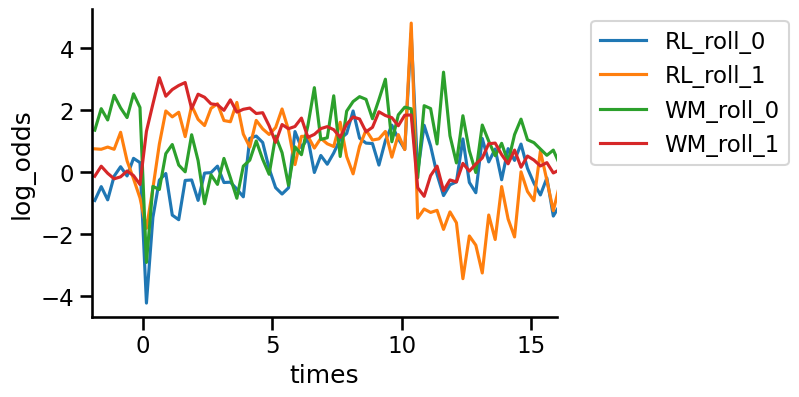

E17_2022-01-29_16-16-15.csv


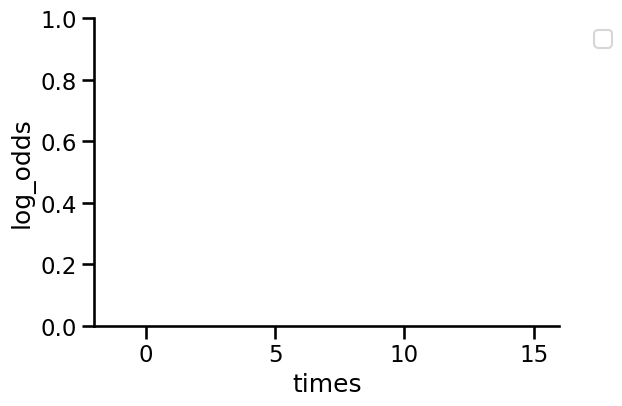

E14_2021-04-02_12-53-42.csv


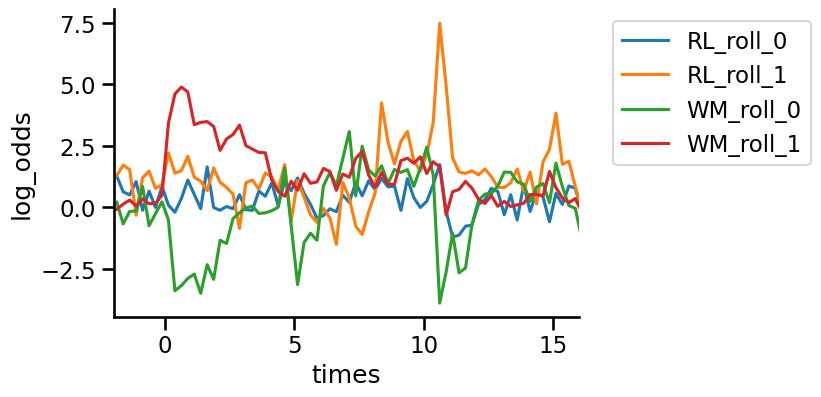

E14_2021-03-29_13-01-12.csv


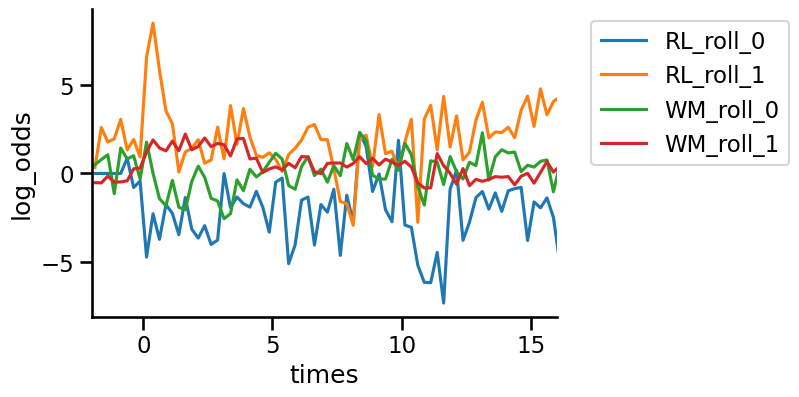

E11_2021-05-27_12-15-58.csv


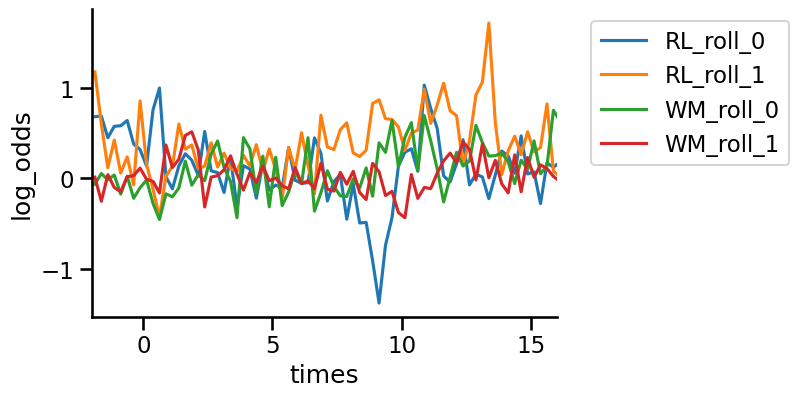

E11_2021-05-26_12-20-58.csv


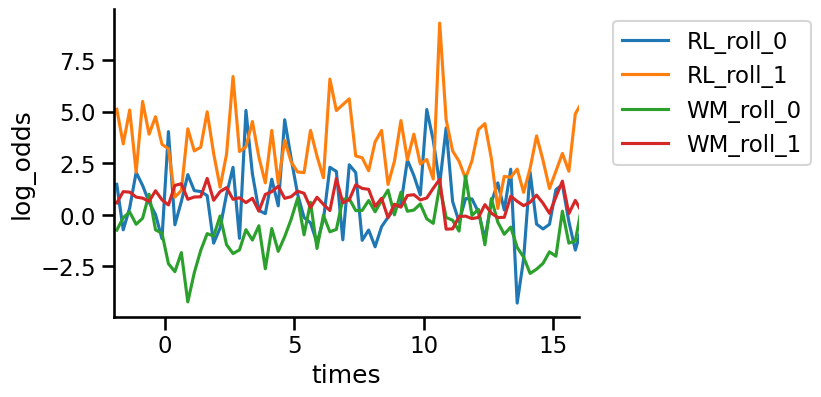

E11_2021-05-14_14-27-21.csv


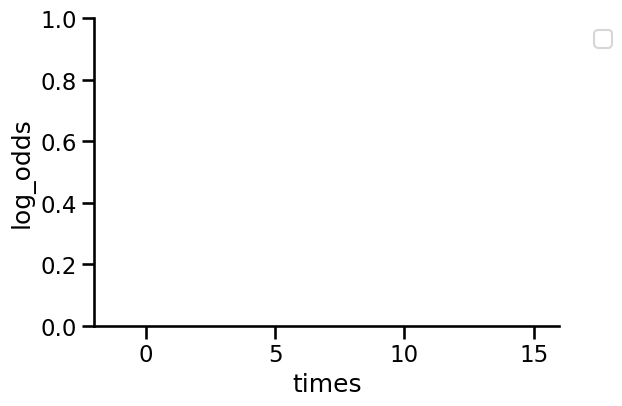

E11_2021-05-13_12-34-49.csv


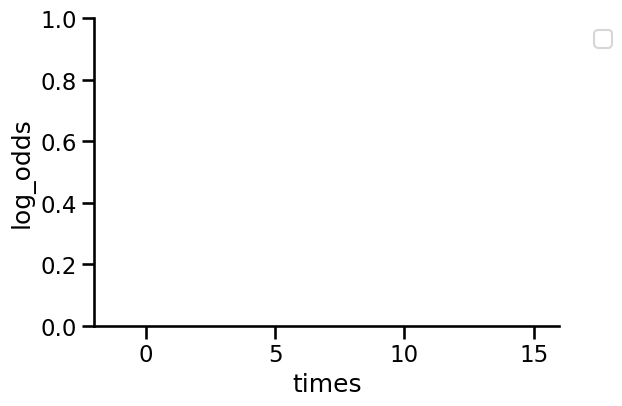

E11_2021-05-12_12-56-16.csv


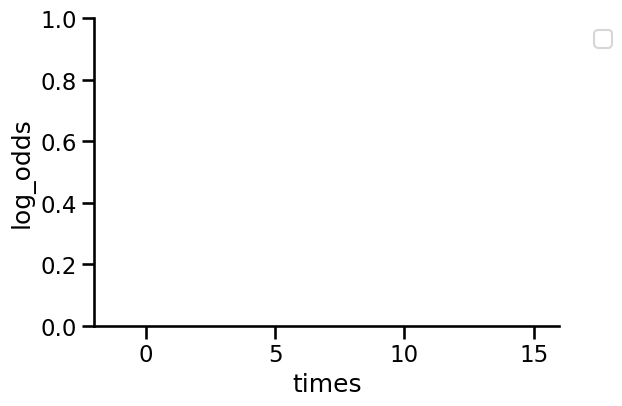

E04_2021-04-03_16-12-15.csv


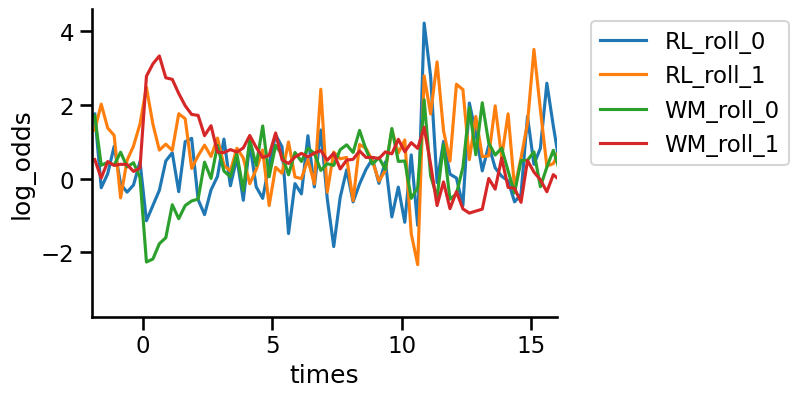

E04_2021-03-30_11-20-16.csv


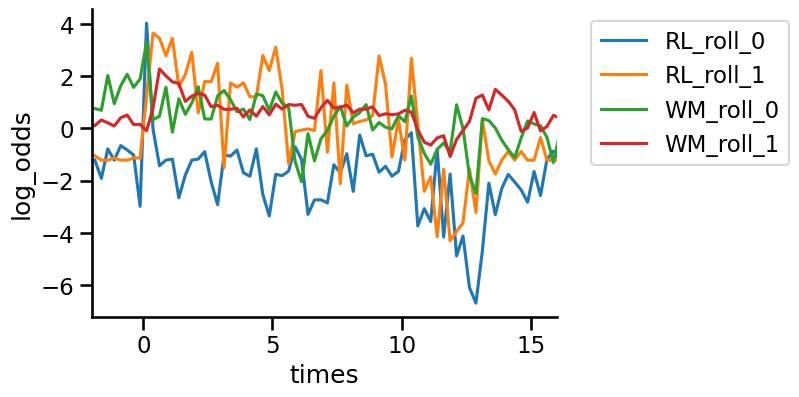

In [3]:
for session in df_cum_sti.session.unique():
    delay = 10
    df_final = df_cum_sti.loc[(df_cum_sti.delay==delay)&(df_cum_sti.session == session)].groupby(['session','times','trial_type'])['log_odds'].mean()
    df_final = df_final.reset_index()
    fig, ax = plt.subplots(figsize=(6,4))
    sns.lineplot(x='times',y='log_odds',data= df_final, hue='trial_type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()
    plt.xlim(-2,delay+6)
    print(session)
    # plt.yl(im(-2,3)
    plt.show()

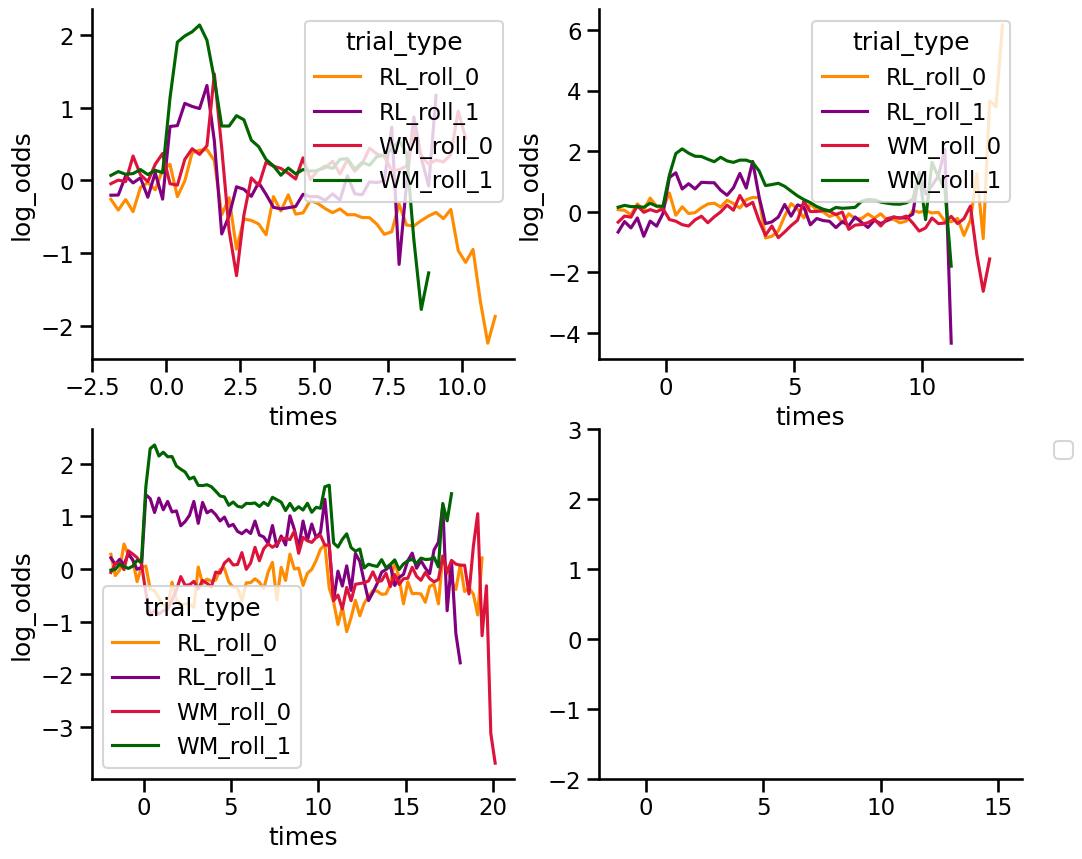

In [158]:
df_cum_sti = df_cum_sti[~df_cum_sti['session'].isin(list_exclude)] 
fig, axs = plt.subplots(2,2, figsize=(12, 10))
for delay, ax in zip([1,3,10], axs.flatten()):
    df_final = df_cum_sti.loc[(df_cum_sti.delay==delay)].groupby(['session','times','trial_type'])['log_odds'].mean()
    df_final = df_final.reset_index()
    sns.lineplot(x='times',y='log_odds',data= df_final, hue='trial_type', palette=['darkorange', 'purple',  'crimson','darkgreen'], ax=ax, ci = None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(-2,delay+6)
    plt.ylim(-2,3)
sns.despine()
plt.show()

In [ ]:
df_cum_sti.times.unique()

In [ ]:
filename = 'final_odds'
df_cum_sti.to_csv(filename+'.csv')

In [ ]:
df_cum_sti['log_odds'] = np.where((df_cum_sti.trial_type == 'RL_roll_1')&(df_cum_sti.times ==  6.375)&(df_cum_sti.delay == 10), df_cum_sti.log_odds-0.2, df_cum_sti.log_odds)

## Look at the differences between sections of the delay and the different types of trials

In [ ]:
# file_name = 'final_log_odds_V4'
file_name = 'single_delay_WM_roll0.6_lick_0.25_V1'

save_path = 'G:/My Drive/WORKING_MEMORY/PAPER/ANALYSIS_figures/'
os.chdir(save_path)
df_cum_sti = pd.read_csv(file_name+'.csv', index_col = 0)
# df_cum_res = pd.read_csv(file_name+'_res.csv', index_col = 0)

In [ ]:
df_cum_sti['state'] = np.where((df_cum_sti.trial_type =='WM_roll_1')|(df_cum_sti.trial_type =='WM_roll_0'), 1, 0)
df_cum_sti['hit'] = np.where((df_cum_sti.trial_type =='WM_roll_1')|(df_cum_sti.trial_type =='RL_roll_1'), 1, 0)

In [ ]:
timepoint = 9.375

df_new = df_cum_sti.loc[(df_cum_sti.delay == 10)&((df_cum_sti.times ==  timepoint)|(df_cum_sti.times ==  timepoint+0.25)|
(df_cum_sti.times ==  timepoint+0.5)|(df_cum_sti.times ==  timepoint+0.75))].groupby(['fold','session','trial_type','trial','state','hit']).log_odds.mean()
df_new = df_new.reset_index()

df_results = pd.DataFrame()
df_results = df_new.groupby(['fold','session', 'trial','trial_type','state','hit']).log_odds.mean()
df_results = df_results.reset_index()

df_late = df_results
df_late['epoch'] = 'late'

In [ ]:
timepoint = 0.375

df_new = df_cum_sti.loc[(df_cum_sti.delay == 10)&((df_cum_sti.times ==  timepoint)|(df_cum_sti.times ==  timepoint+0.25)|(df_cum_sti.times ==  timepoint+0.5)|(df_cum_sti.times ==  timepoint+0.75))].groupby(['fold','session','trial_type','trial','state','hit']).log_odds.mean()
df_new = df_new.reset_index()

df_results = pd.DataFrame()
df_results = df_new.groupby(['fold','session', 'trial','trial_type','state','hit']).log_odds.mean()
df_results = df_results.reset_index()

df_early = df_results
df_early['epoch'] = 'early'

In [ ]:
df_final = pd.concat([df_early,df_late])

In [ ]:
list_exclude = [
                'E11_2021-05-24_14-33-29.csv',
                # 'E11_2021-05-27_12-15-58.csv', 
                'E13_2021-05-25_16-26-57.csv', 
                'E13_2021-05-26_15-01-42.csv',
                'E13_2021-06-06_11-29-34.csv',
                'E13_2021-06-08_11-22-23.csv', 
                'E13_2021-06-09_12-14-21.csv',
                'E14_2021-03-31_13-07-18.csv',
                'E17_2022-02-13_17-14-28.csv', 
                'E19_2022-01-15_15-13-28.csv',
                'E19_2022-01-16_15-40-47.csv',
                'E19_2022-01-17_15-34-37.csv',
                # 'E20_2022-02-13_15-10-51.csv',
                # 'E22_2022-01-17_18-05-16.csv', 
                'E22_2022-01-21_16-23-50.csv']
df_final = df_final[~df_final['session'].isin(list_exclude)] 

In [ ]:
df_final = df_final.loc[((df_final.trial_type ==  'WM_roll_1')|(df_final.trial_type ==  'WM_roll_0'))]

In [ ]:
df_results = df_final.groupby(['session', 'trial_type','epoch']).log_odds.mean()
df_results = df_results.reset_index()

fix= plt.figure(figsize=(5,4))
sns.boxplot(x='trial_type', y='log_odds',hue='epoch',palette=['darkorange','grey'] ,data=df_results,  showmeans=True, showfliers=False)

plt.ylim(-3.5,5)
plt.hlines(xmin=-0.5, xmax=1.5, y=0, linestyle=':')
sns.despine()

In [ ]:
fig, panel = plt.subplots(1,1,figsize=(5,4))

df_results = df_final.groupby(['session', 'trial_type','epoch']).log_odds.mean()
df_results = df_results.reset_index()

sns.boxplot(x='trial_type', y='log_odds',hue='epoch', order=['WM_roll_1','WM_roll_0'], showcaps=False, showfliers=False, 
            palette=['darkgreen','lightgreen', 'darkred', 'lightred'], linewidth=0 , ax = panel, data=df_results, width = 0.5)
sns.boxplot(x='trial_type', y='log_odds',hue='epoch', order=['WM_roll_1','WM_roll_0'], showcaps=False, showfliers=False,
            palette=['darkgreen','lightgreen', 'darkred', 'lightred'], medianprops=dict(color="white"),
            linewidth=1, ax = panel, data=df_results, width = 0.5)

df_plots = df_results.loc[(df_results.trial_type == 'WM_roll_1')&(df_results.epoch == 'early')]
xA = np.random.normal(-0.2, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='darkgreen')

df_plots = df_results.loc[(df_results.trial_type == 'WM_roll_1')&(df_results.epoch == 'late')]
xA = np.random.normal(0.2, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='green')

df_plots = df_results.loc[(df_results.trial_type == 'WM_roll_0')&(df_results.epoch == 'early')]
xA = np.random.normal(.8, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='crimson')

df_plots = df_results.loc[(df_results.trial_type == 'WM_roll_0')&(df_results.epoch == 'late')]
xA = np.random.normal(1.15, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='pink')

panel.set_ylim(-6,9)
panel.hlines(xmin=-0.5, xmax=1.5, y=0, linestyle=':')
panel.set_ylabel('Log odds')
panel.legend([])
sns.despine()

In [ ]:
df_final = df_final.loc[(df_final.trial_type == 'WM_roll_1')|(df_final.trial_type == 'WM_roll_0')]

In [ ]:
# filename = 'logodds_WM1_WM0'
# df_final.to_csv(save_path+filename+'.csv')


filename = 'logodds_WM1_WM0'
df_final = pd.read_csv(save_path+filename+'.csv')

In [ ]:
# use R packages in python code. You have to have R installed, and the specific
# packages also need to be installed in R
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import statsmodels.formula.api as smf

pandas2ri.activate()

base     = importr('base')
car      = importr('car')
stats    = importr('stats')
lme4     = importr('lme4')
scales   = importr('scales')
lmerTest = importr('lmerTest')

In [ ]:
r_df  = ro.conversion.py2ri(df_final)

# formula="logs ~ state*epoch + (1|session)"
# formula="logs ~ state*epoch + (1|session)+ (1|fold)"
# formula="logs ~ state*epoch + (state+epoch+1|session) + (state+epoch+1|fold)"
formula="log_odds ~ hit*epoch + (hit+epoch+1|session:fold)"

model = lme4.lmer(formula, data=r_df)

for i, v in enumerate(list(base.summary(model).names)):
    if v in ['coefficients']:
        print (base.summary(model).rx2(v))
# print(base.summary(model))
print(car.Anova(model))

In [ ]:
from scipy import stats

data_group1 = df_final.loc[(df_final.trial_type == 'WM_roll_0')&(df_final.epoch == 'early')].groupby('session').log_odds.mean().values
data_group2 = df_final.loc[(df_final.trial_type == 'WM_roll_0')&(df_final.epoch == 'late')].groupby('session').log_odds.mean().values

print(stats.ttest_1samp(data_group1, 0))
print(stats.ttest_1samp(data_group2, 0))

In [ ]:
print(scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_0')&(df_final.epoch == 'early')].groupby('session')['log_odds'].mean(), alternative='less'))
scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_0')&(df_final.epoch == 'late')].groupby('session')['log_odds'].mean())

In [ ]:
scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_1')&(df_final.epoch == 'early')].groupby('session')['log_odds'].mean(),
df_final.loc[(df_final.trial_type == 'WM_roll_1')&(df_final.epoch == 'late')].groupby('session')['log_odds'].mean())


In [ ]:
scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_0')&(df_final.epoch == 'early')].groupby('session')['log_odds'].mean(),
df_final.loc[(df_final.trial_type == 'WM_roll_0')&(df_final.epoch == 'late')].groupby('session')['log_odds'].mean())

#### Same but with code for RL and WM

In [ ]:

df_cum_sti['state'] = np.where((df_cum_sti.trial_type =='WM_roll_1')|(df_cum_sti.trial_type =='WM_roll_0'), 1, 0)
df_cum_sti['hit'] = np.where((df_cum_sti.trial_type =='WM_roll_1')|(df_cum_sti.trial_type =='RL_roll_1'), 1, 0)

In [ ]:
timepoint = 0.375

df_new = df_cum_sti.loc[(df_cum_sti.times ==  timepoint)|(df_cum_sti.times ==  timepoint+0.25)].groupby(['fold','session','trial_type','trial','state','hit']).log_odds.mean()
df_new = df_new.reset_index()

df_results = pd.DataFrame()
df_results = df_new.groupby(['fold','session', 'trial','trial_type','state','hit']).log_odds.mean()
df_results = df_results.reset_index()

df_early = df_results
df_early['epoch'] = 'early'

In [ ]:
condition = ((df_cum_sti.times == 9.875) | (df_cum_sti.times == 10.125)) & (df_cum_sti.delay == 10)
condition2 = ((df_cum_sti.times == 2.875) | (df_cum_sti.times == 2.125)) & (df_cum_sti.delay == 3)
condition3 = ((df_cum_sti.times == 0.875) | (df_cum_sti.times == 1.125)) & (df_cum_sti.delay == 1) 

df_new = df_cum_sti.loc[(condition | condition2 | condition3)].groupby(['fold','session','trial_type','trial','state','hit','times']).log_odds.mean()
df_new = df_new.reset_index()

df_results = pd.DataFrame()
df_results = df_new.groupby(['fold','session', 'trial','trial_type','state','hit','times']).log_odds.mean()
df_results = df_results.reset_index()

df_late = df_results
df_late['epoch'] = 'late'

In [ ]:
df_final = pd.concat([df_early,df_late])

In [ ]:
list_exclude = [
                'E11_2021-05-24_14-33-29.csv',
                # 'E11_2021-05-27_12-15-58.csv', 
                'E13_2021-05-25_16-26-57.csv', 
                'E13_2021-05-26_15-01-42.csv',
                'E13_2021-06-06_11-29-34.csv',
                'E13_2021-06-08_11-22-23.csv', 
                'E13_2021-06-09_12-14-21.csv',
                'E14_2021-03-31_13-07-18.csv',
                'E17_2022-02-13_17-14-28.csv', 
                'E19_2022-01-15_15-13-28.csv',
                'E19_2022-01-16_15-40-47.csv',
                'E19_2022-01-17_15-34-37.csv',
                # 'E20_2022-02-13_15-10-51.csv',
                # 'E22_2022-01-17_18-05-16.csv', 
                'E22_2022-01-21_16-23-50.csv']
df_final = df_final[~df_final['session'].isin(list_exclude)] 

In [ ]:
len(df_final.groupby('session'))

In [ ]:
fig, panel = plt.subplots(1,1,figsize=(6,4))

df_results = df_final.groupby(['session', 'trial_type','epoch']).log_odds.mean()
df_results = df_results.reset_index()

sns.boxplot(x='trial_type', y='log_odds',hue='epoch', order=['WM_roll_1','RL_roll_1'], showcaps=False, showfliers=False, 
            palette=['darkgreen','lightgreen', 'darkred', 'lightred'], linewidth=0 , ax = panel, data=df_results, width = 0.)
sns.boxplot(x='trial_type', y='log_odds',hue='epoch', order=['WM_roll_1','RL_roll_1'], showcaps=False, showfliers=False,
            palette=['darkgreen','lightgreen', 'indigo', 'lightred'], medianprops=dict(color="white"),
            linewidth=1, ax = panel, data=df_results, showmeans=True, width = 0.5)

df_plots = df_results.loc[(df_results.trial_type == 'WM_roll_1')&(df_results.epoch == 'early')]
xA = np.random.normal(-0.2, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='darkgreen')

df_plots = df_results.loc[(df_results.trial_type == 'WM_roll_1')&(df_results.epoch == 'late')]
xA = np.random.normal(0.2, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='green')

df_plots = df_results.loc[(df_results.trial_type == 'RL_roll_1')&(df_results.epoch == 'early')]
xA = np.random.normal(.8, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='indigo')

df_plots = df_results.loc[(df_results.trial_type == 'RL_roll_1')&(df_results.epoch == 'late')]
xA = np.random.normal(1.15, 0.05, len(df_plots))
sns.scatterplot(x=xA,y='log_odds',data=df_plots,ax=panel,alpha=0.9,legend=False, color='purple')

panel.set_ylim(-2,7.5)
panel.hlines(xmin=-0.5, xmax=1.5, y=0, linestyle=':')
panel.set_ylabel('Log odds')
panel.legend([])
plt.savefig('logodds_WM1_RL1.svg', bbox_inches='tight')
sns.despine()

In [ ]:
df_final = df_final.loc[((df_final.trial_type ==  'WM_roll_1')|(df_final.trial_type ==  'RL_roll_1'))]

In [ ]:
# filename = 'logodds_WM1_RL1_V1'
# df_final.to_csv(save_path+filename+'.csv')

filename = 'logodds_WM1_RL1'
df_final = pd.read_csv(save_path+filename+'.csv')

In [ ]:
len(df_final.groupby('session'))

In [ ]:
r_df  = ro.conversion.py2ri(df_final)

# formula="logs ~ state*epoch + (1|session)+ (1|fold)"
# formula="logs ~ state*epoch + (state+epoch+1|session) + (state+epoch+1|fold)"
formula="log_odds ~ state*epoch + (state+epoch+1|session:fold)"

model = lme4.lmer(formula, data=r_df)

for i, v in enumerate(list(base.summary(model).names)):
    if v in ['coefficients']:
        print (base.summary(model).rx2(v))
# print(base.summary(model))
print(car.Anova(model))

In [ ]:
print(scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_1')&(df_final.epoch == 'early')].groupby('session')['log_odds'].mean(), alternative='less'))
scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_1')&(df_final.epoch == 'late')].groupby('session')['log_odds'].mean())

In [ ]:
scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'WM_roll_1')&(df_final.epoch == 'early')].groupby('session')['log_odds'].mean(),
df_final.loc[(df_final.trial_type == 'WM_roll_1')&(df_final.epoch == 'late')].groupby('session')['log_odds'].mean())

In [ ]:
scipy.stats.wilcoxon(df_final.loc[(df_final.trial_type == 'RL_roll_1')&(df_final.epoch == 'early')].groupby('session')['log_odds'].mean(),
df_final.loc[(df_final.trial_type == 'RL_roll_1')&(df_final.epoch == 'late')].groupby('session')['log_odds'].mean())